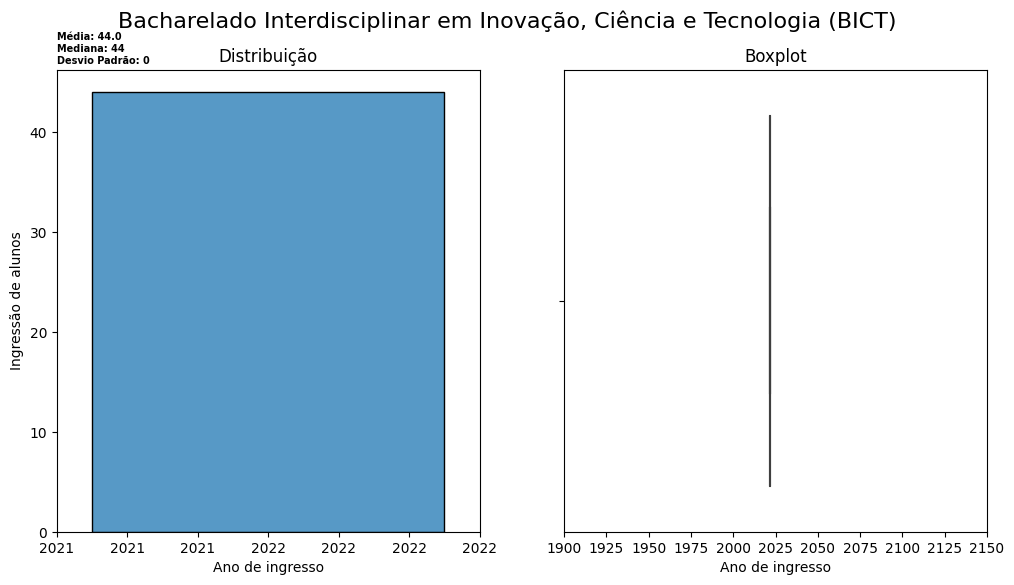

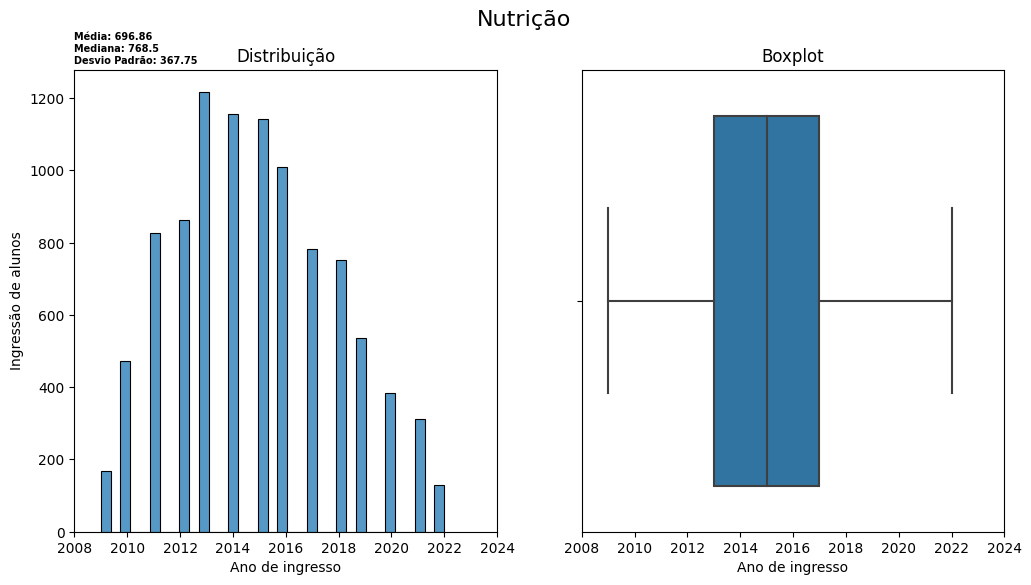

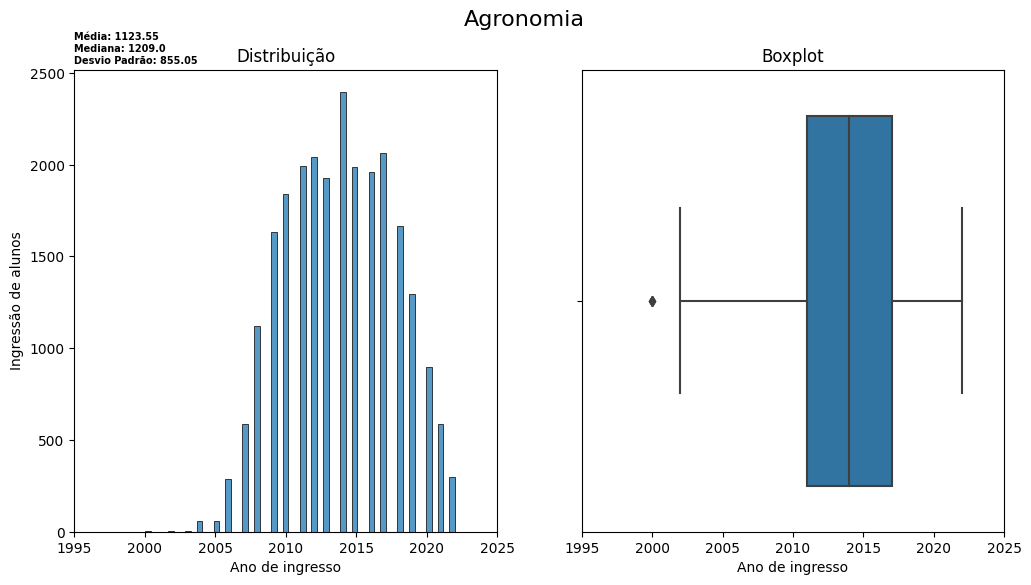

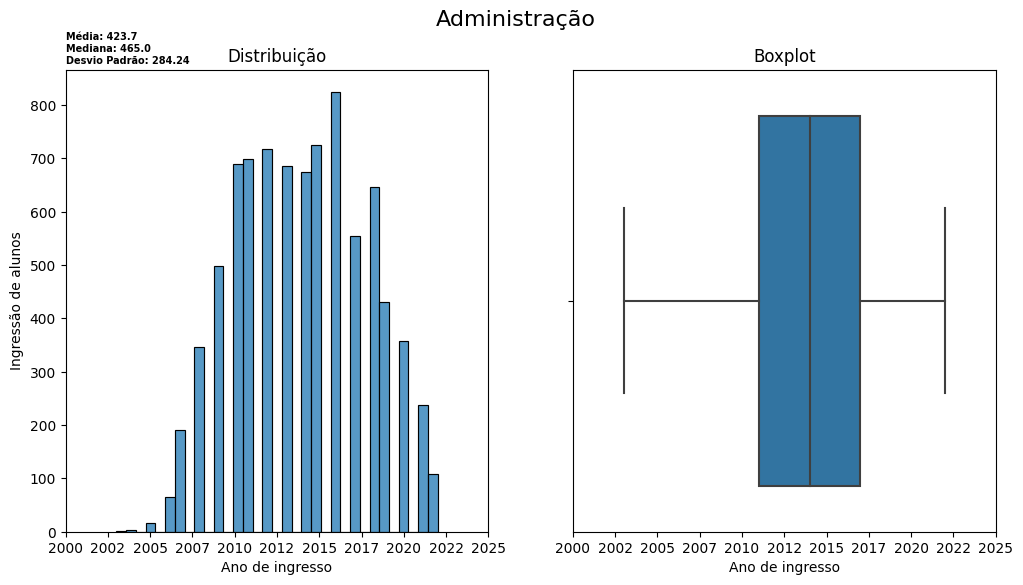

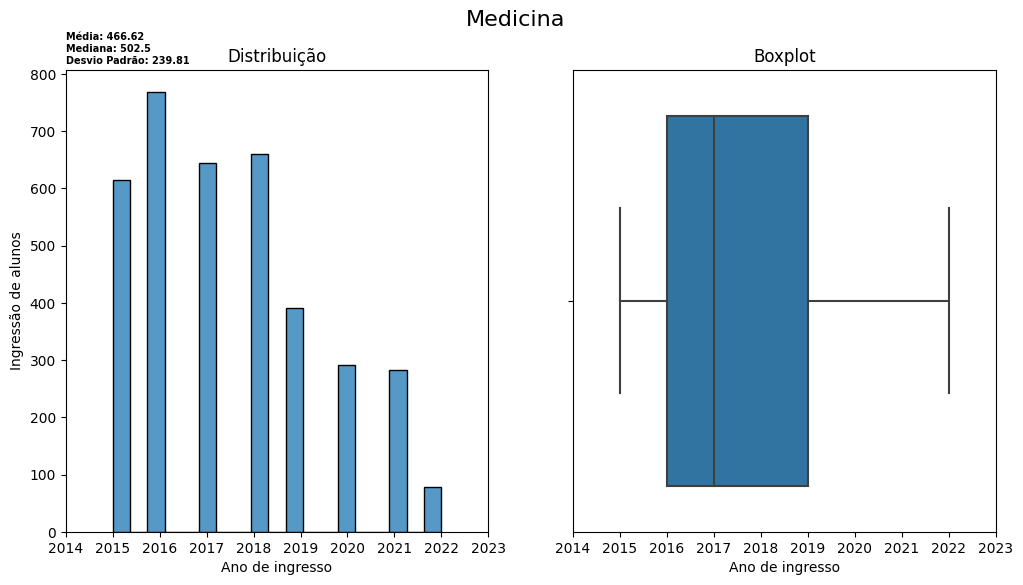

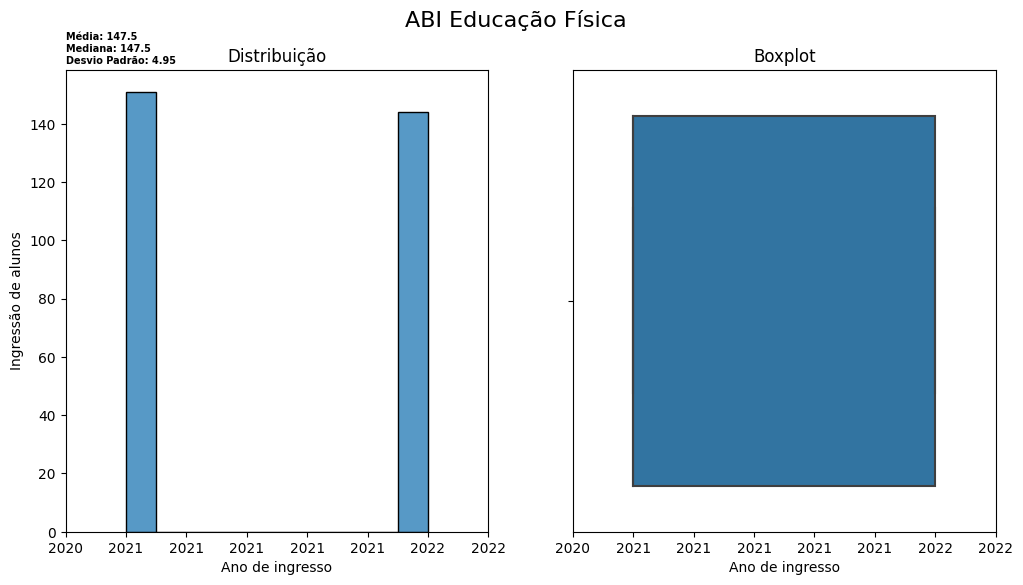

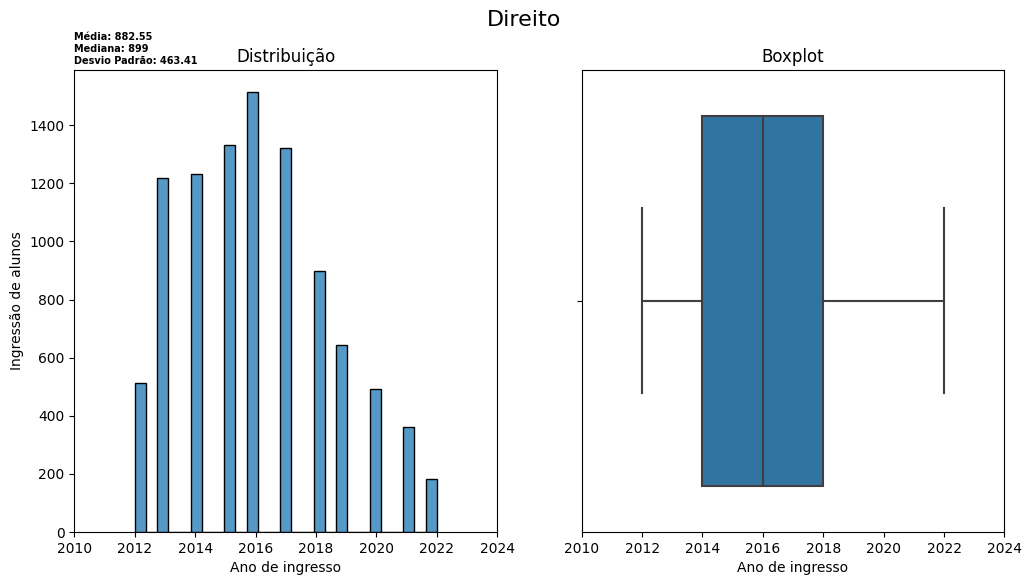

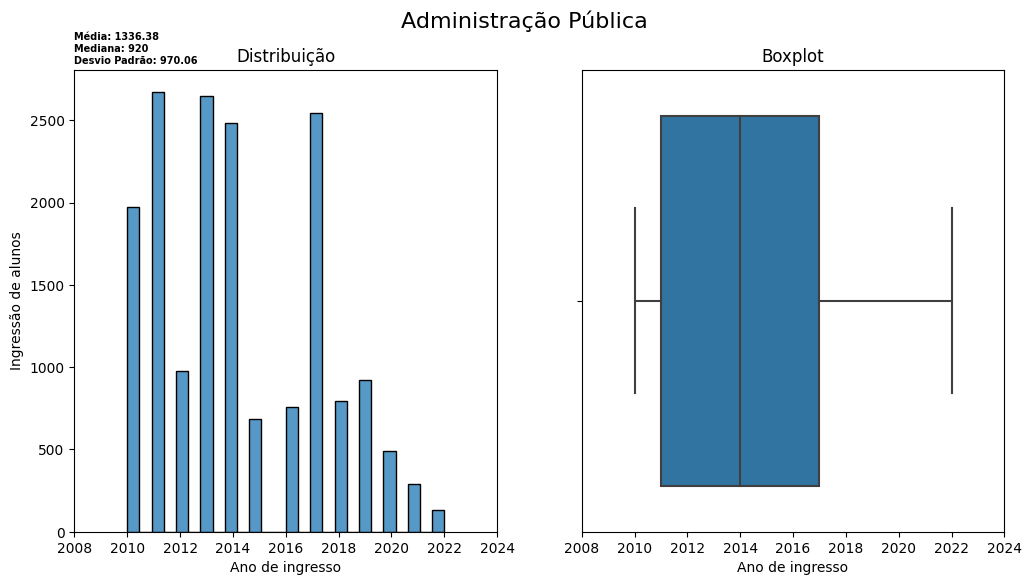

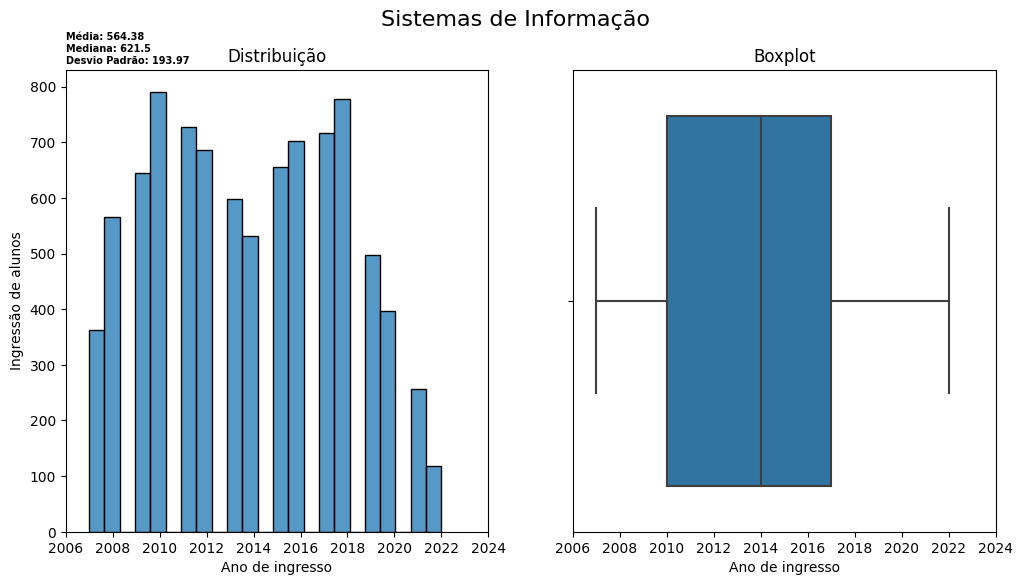

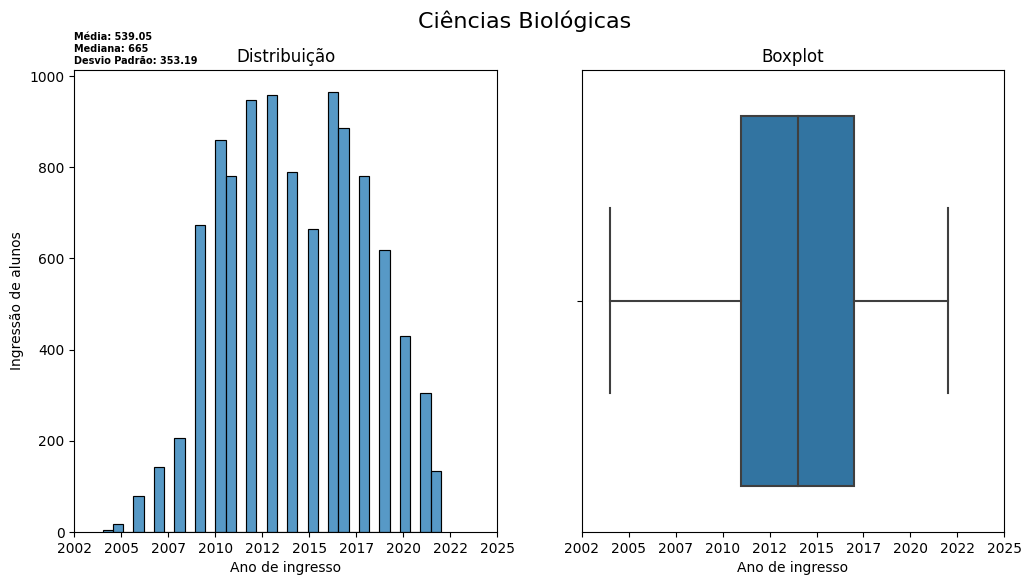

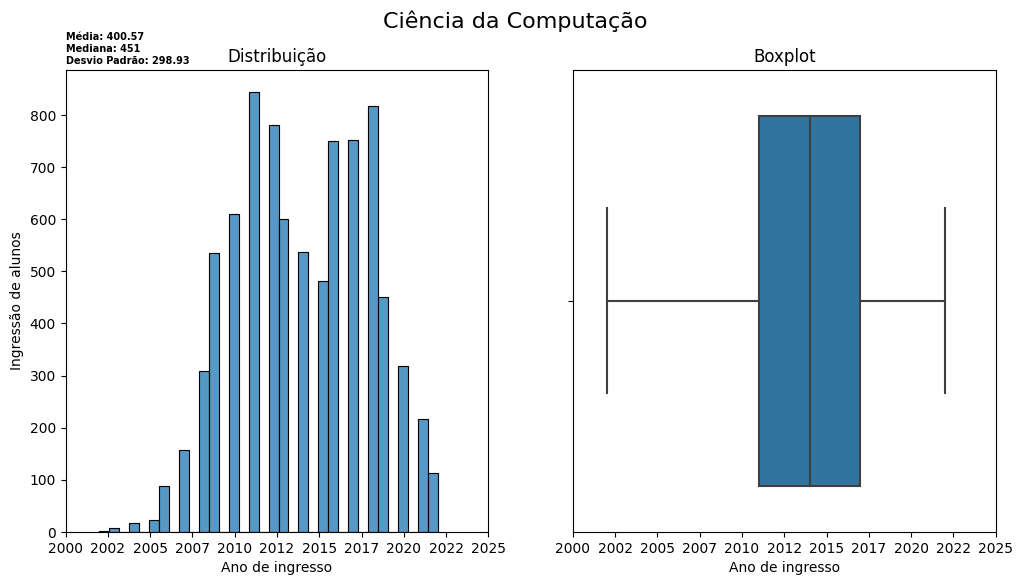

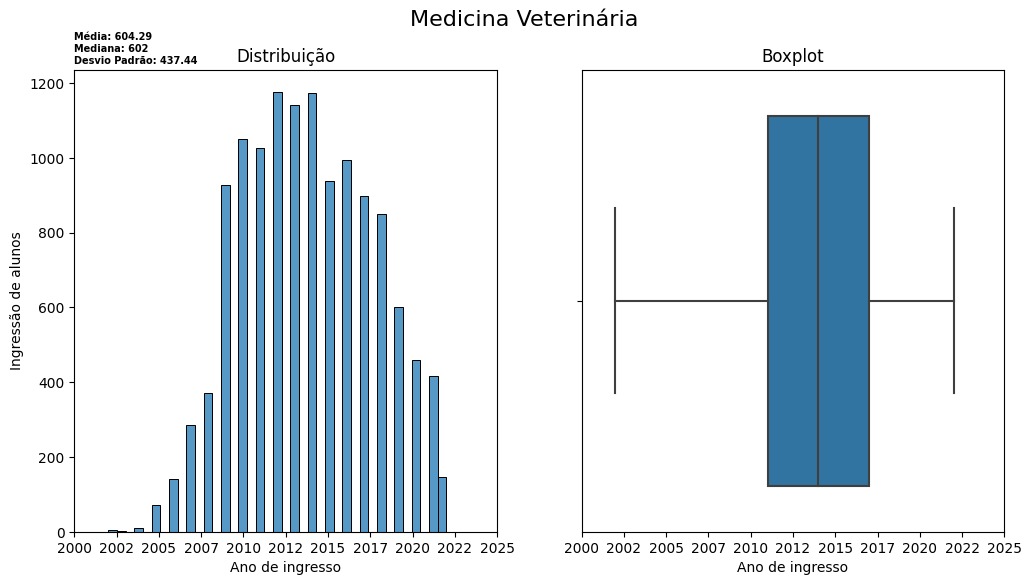

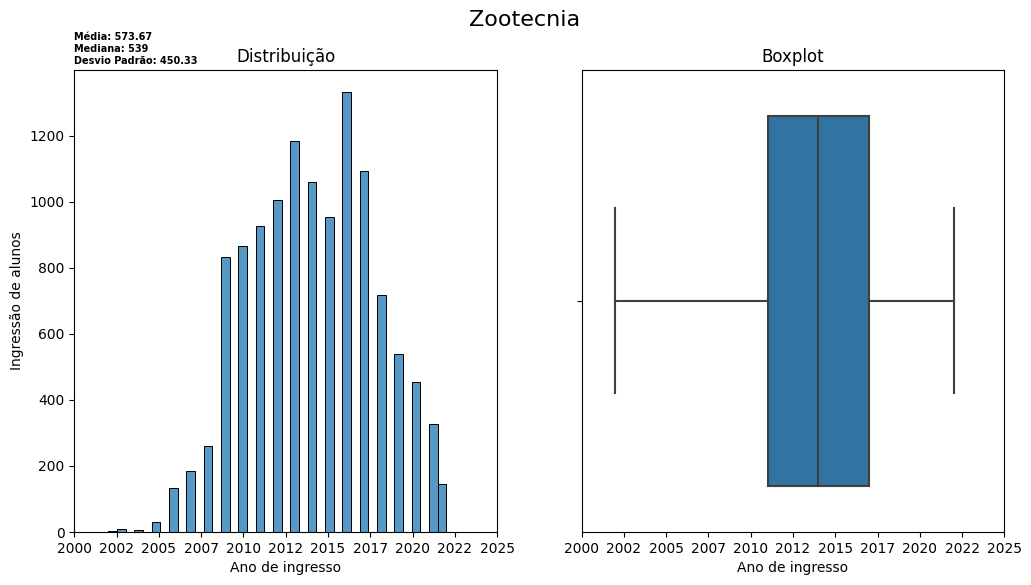

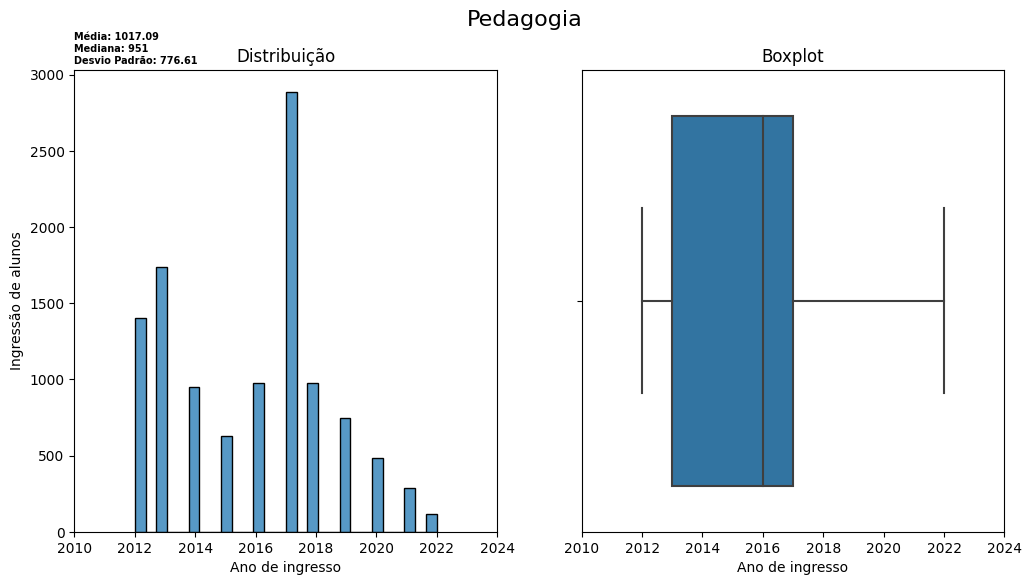

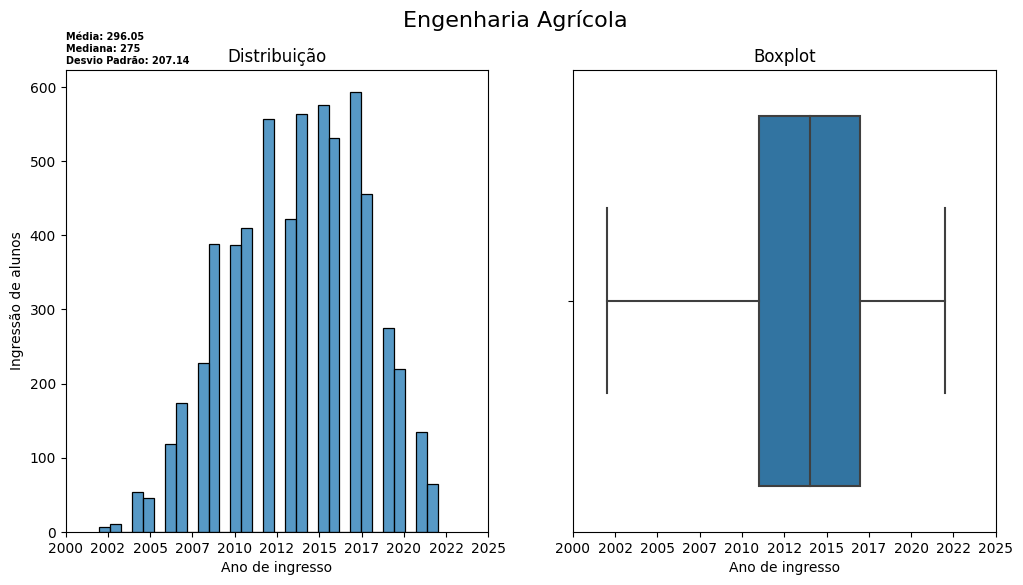

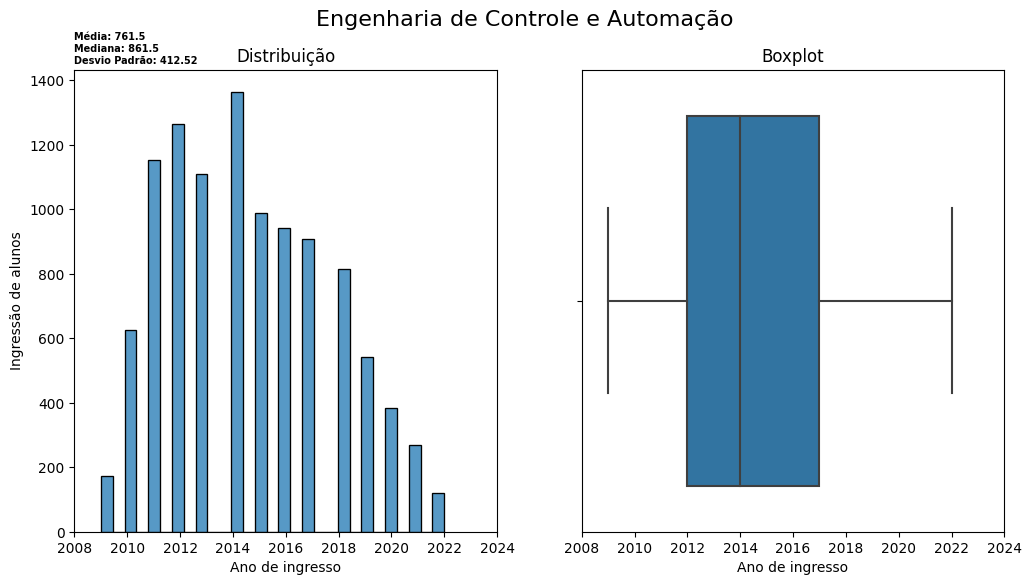

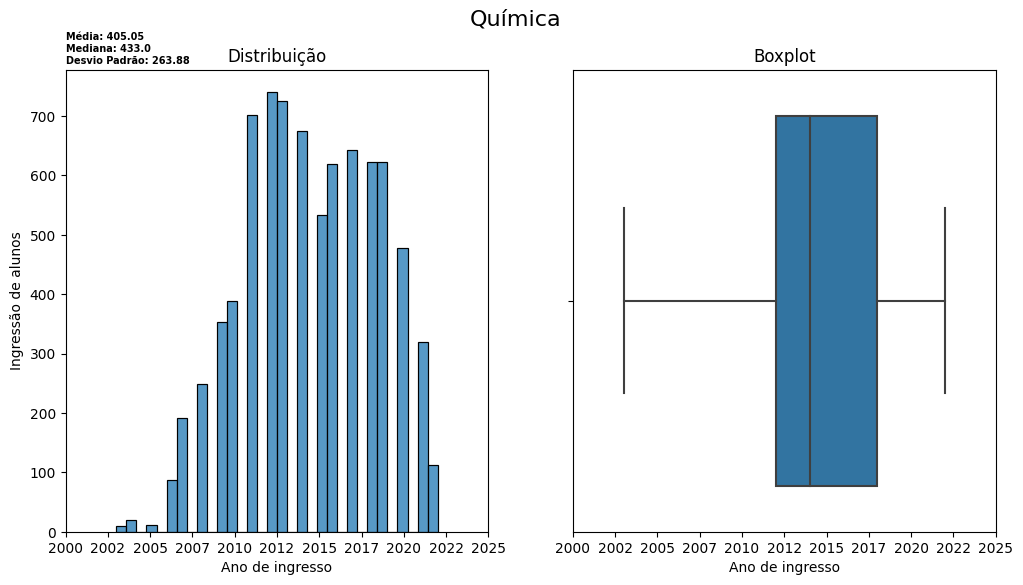

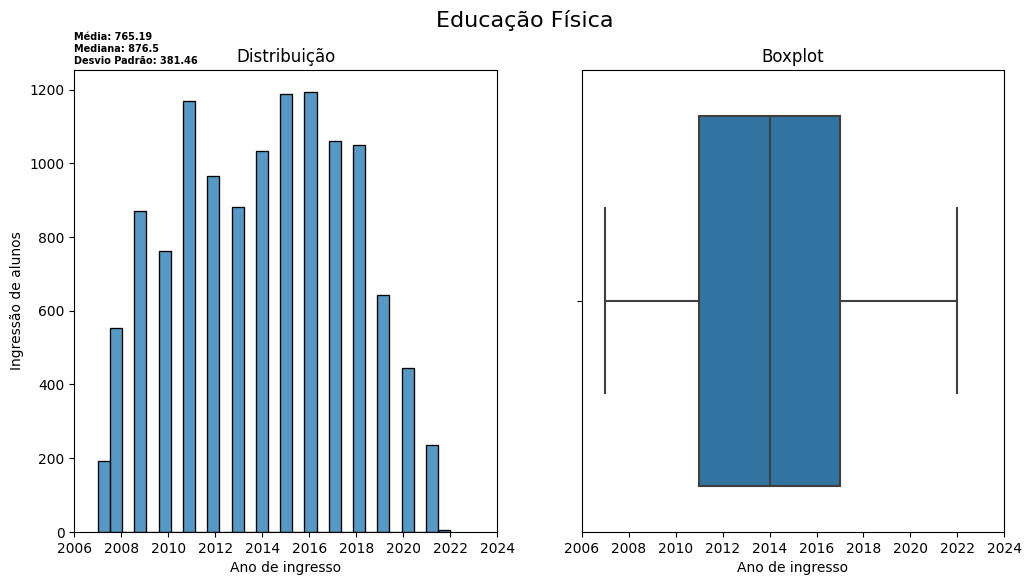

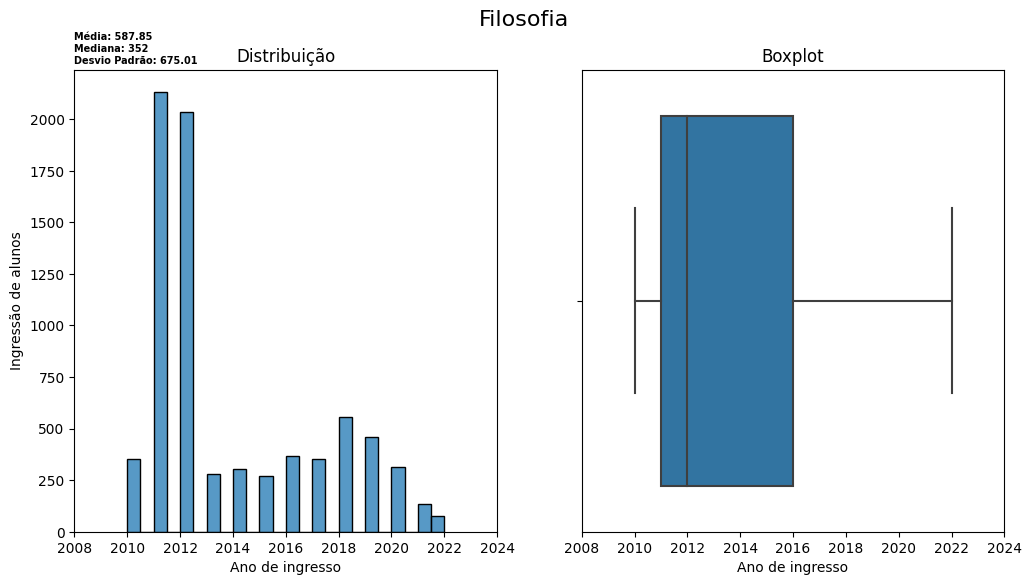

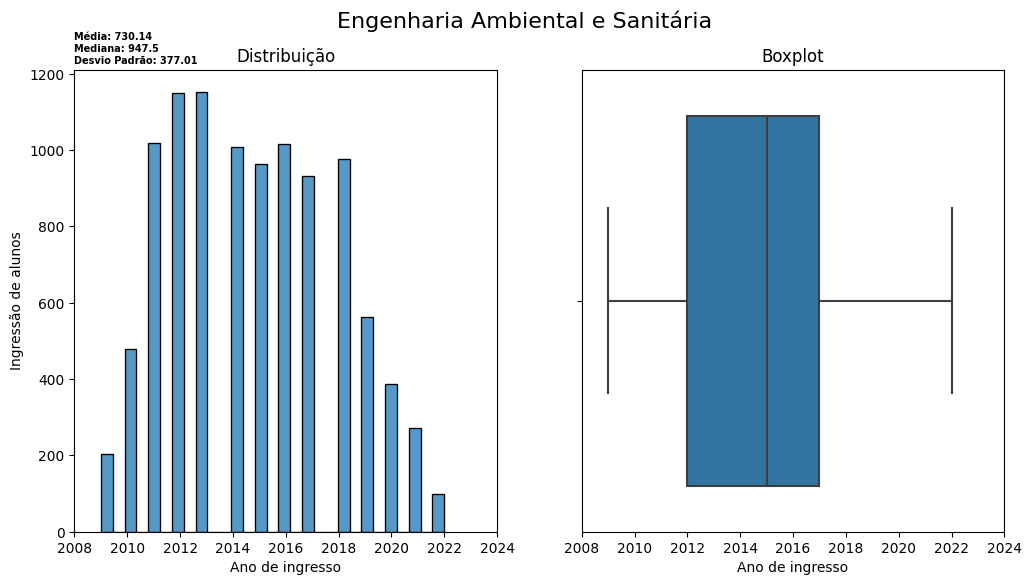

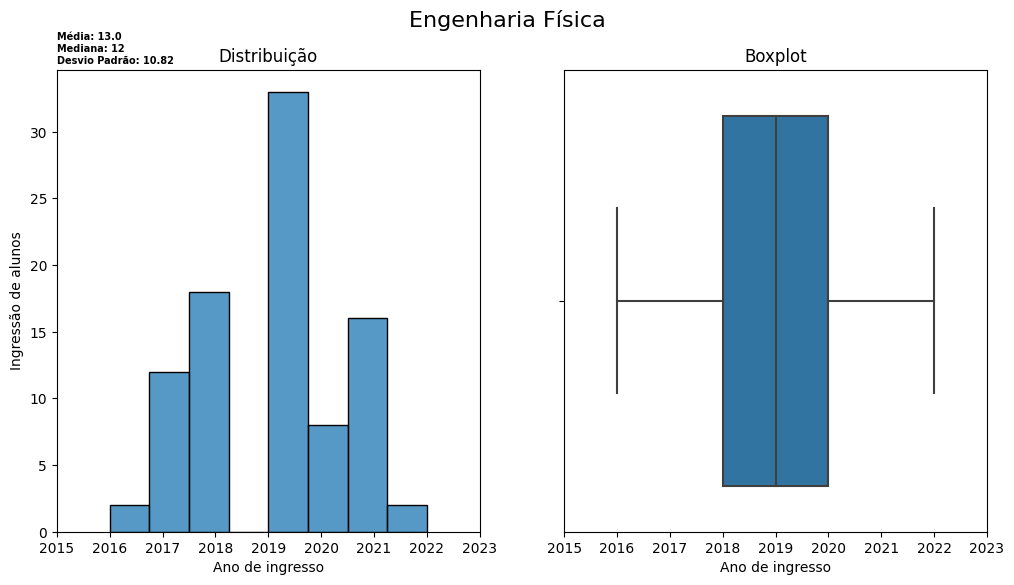

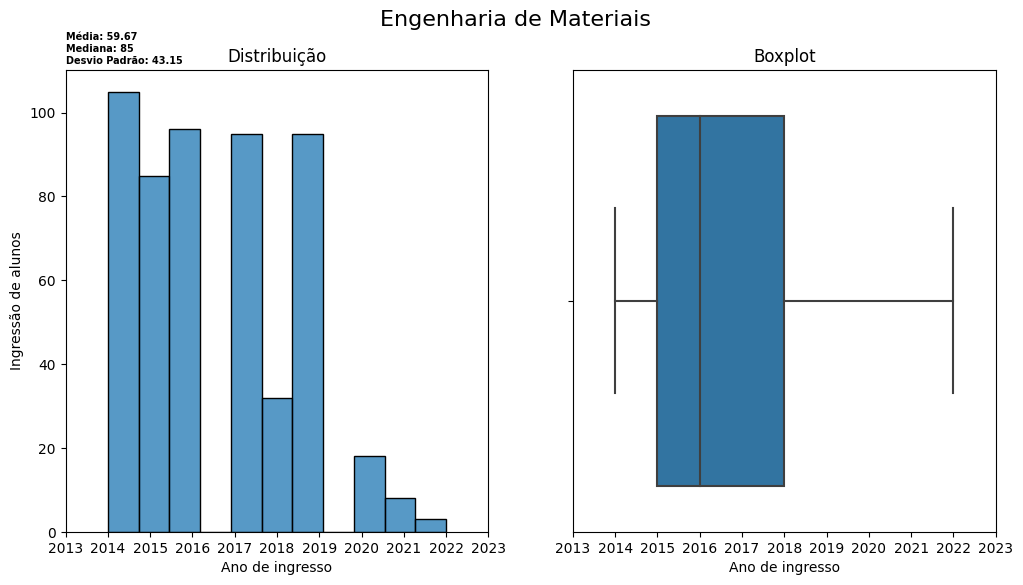

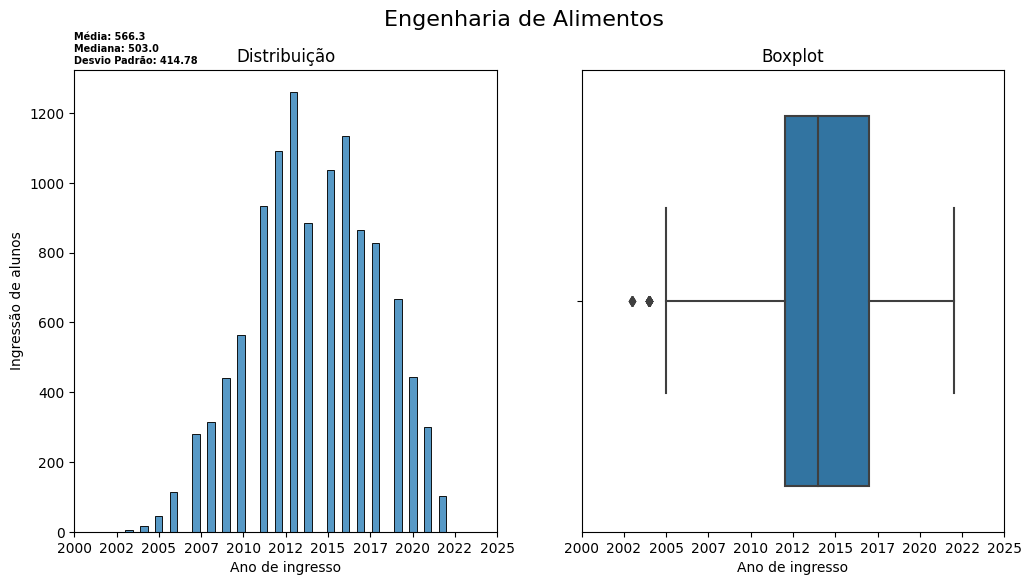

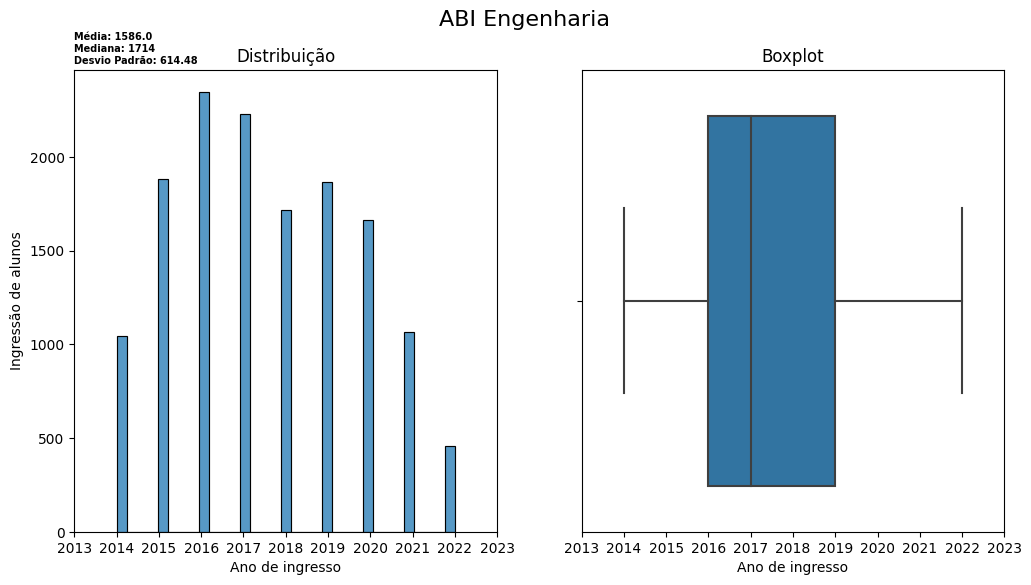

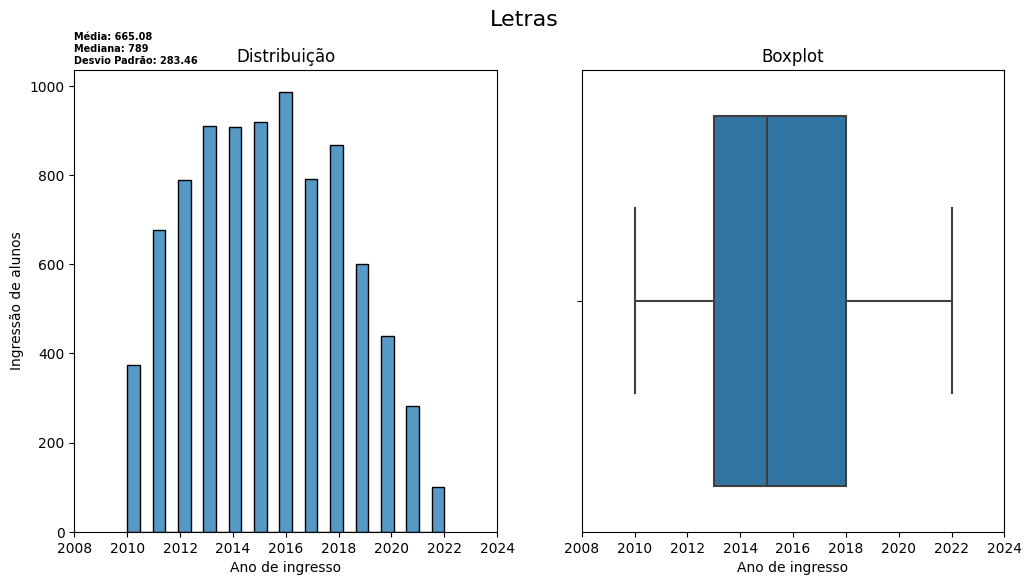

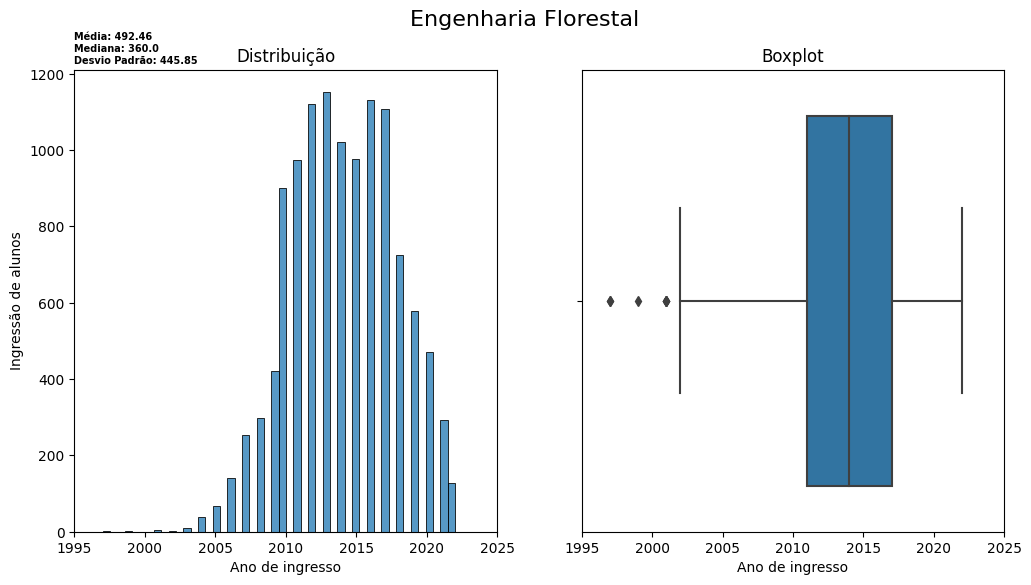

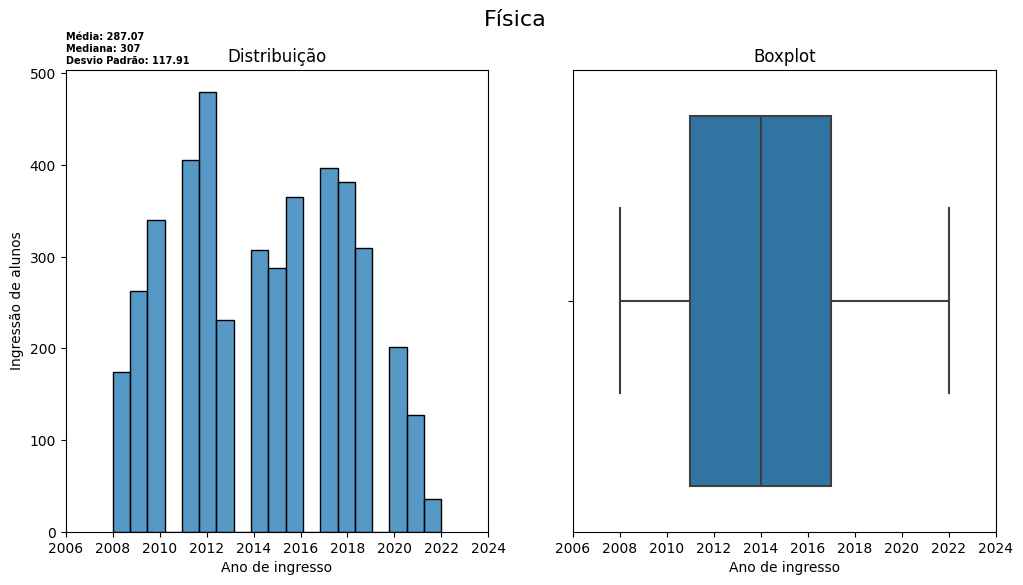

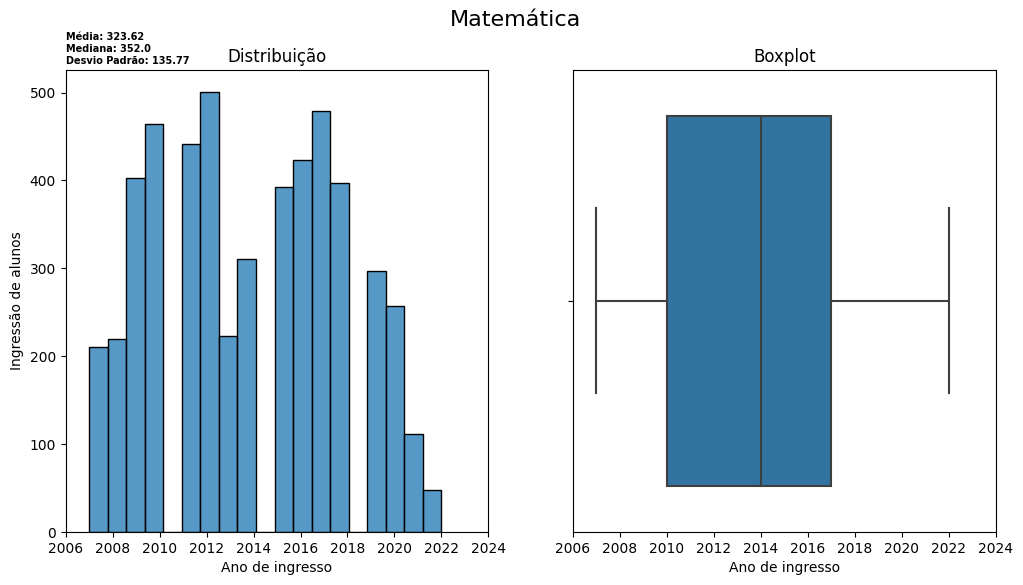

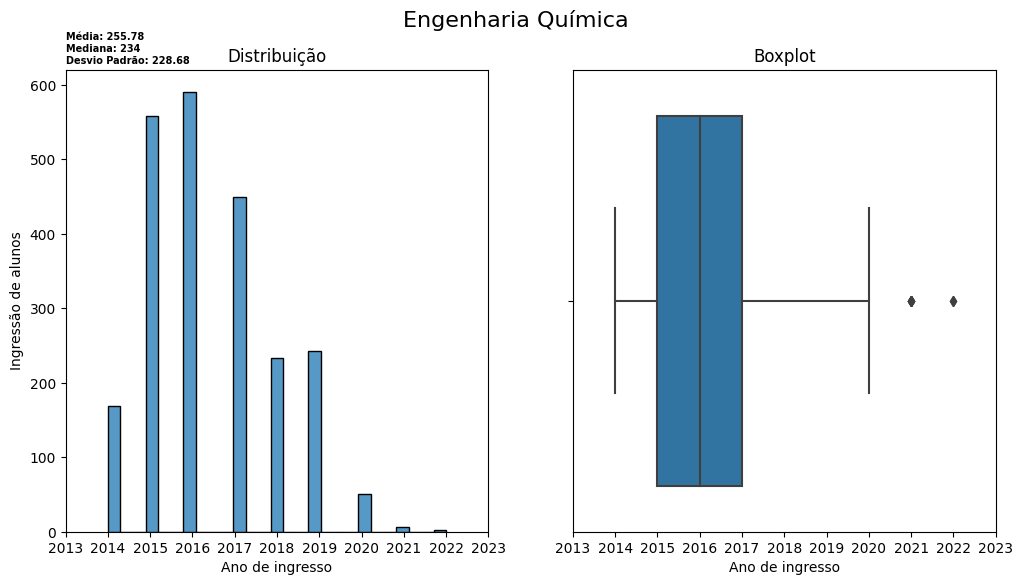

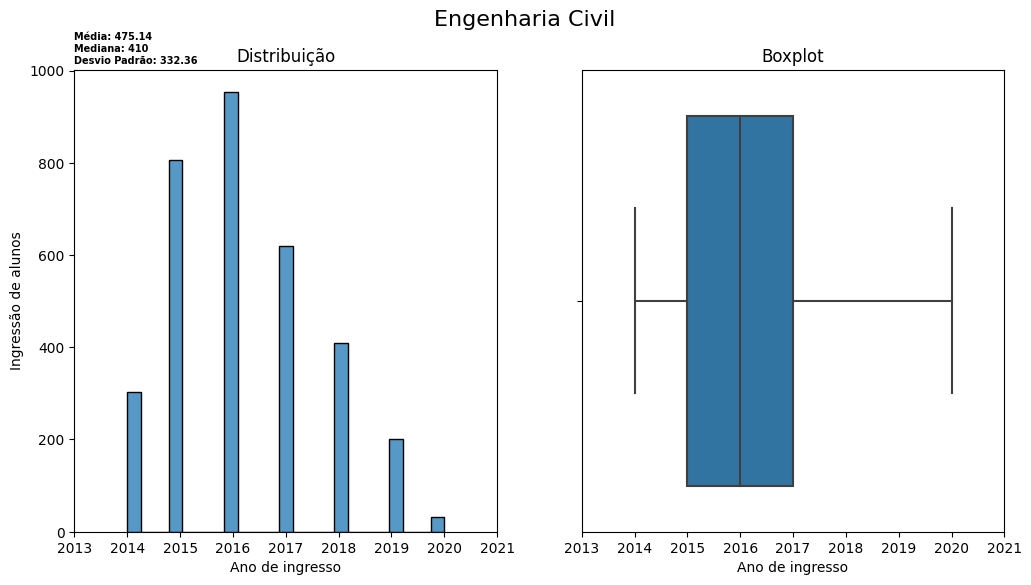

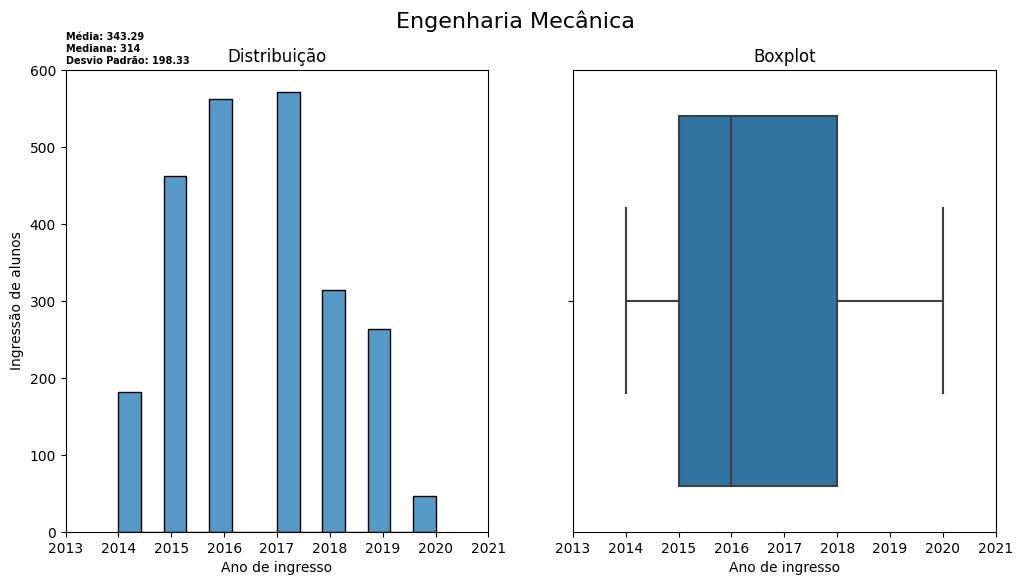

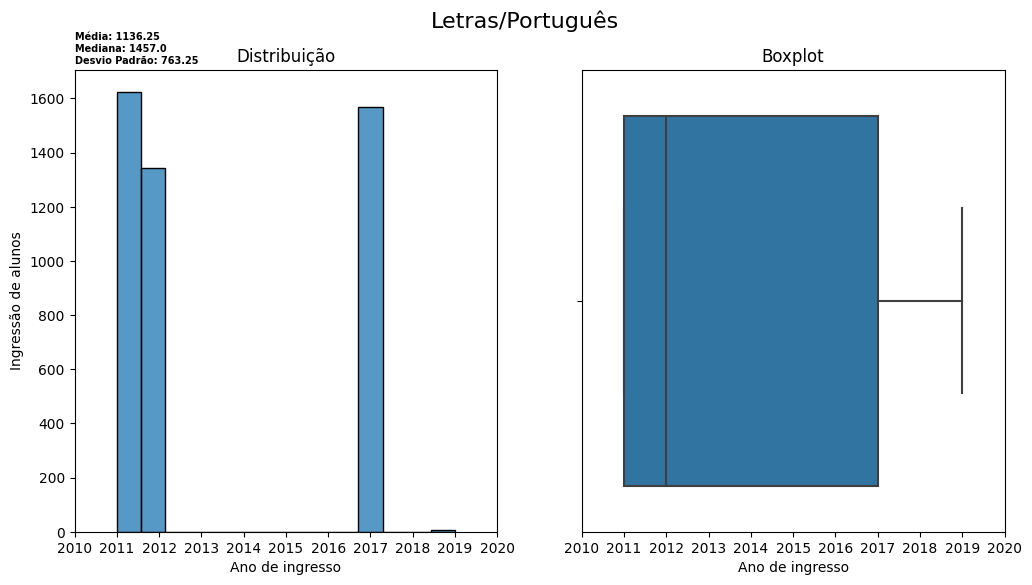

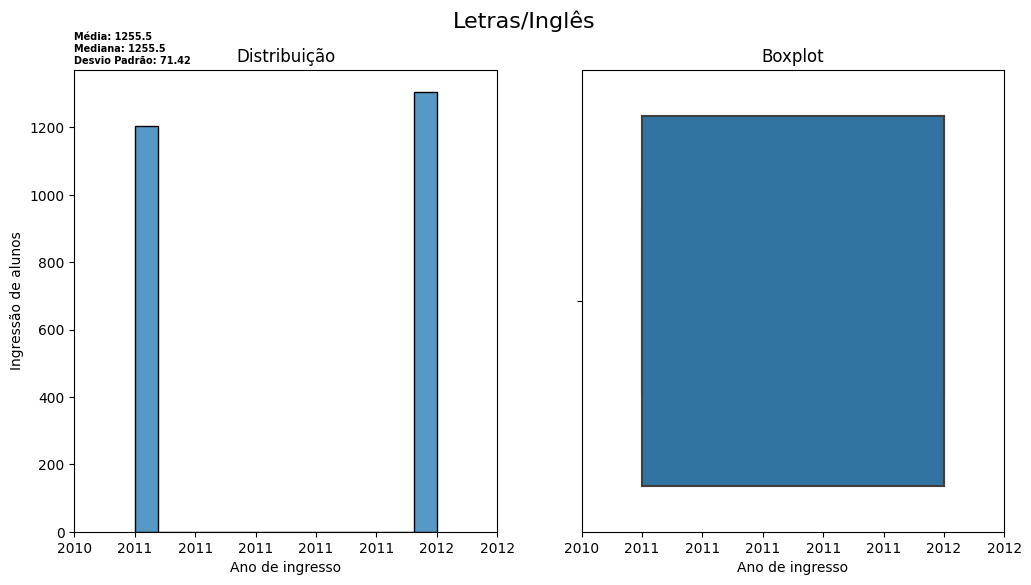

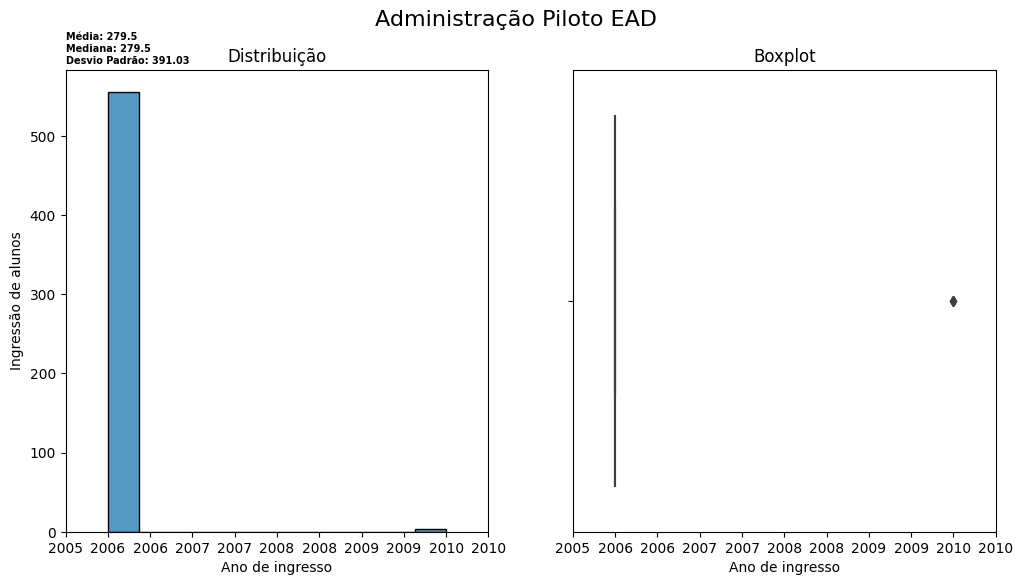

In [1]:
# Dados abertos(Estudantes da graduação Universidade Federal de Lavras): 
# https://dados.gov.br/dados/conjuntos-dados/estudantes-da-graduacao

import csv
import json
import statistics
import matplotlib.pyplot # pip install matplotlib --user
import seaborn # pip install seaborn --user
import pandas # pip install pandas --user

colunas_indesejadas = ['registro_academico', 
                       'ano_letivo_referencia', 
                       'codigo_oferta_curso', 
                       'codigo_inep', 
                       'nome_matriz_curricular', 
                       'sistema_origem', 
                       'data_atualizacao_dw']

with open('./novo_csv.csv', mode='w', newline='', encoding='utf-8') as novoCsv:
    writer = csv.writer(novoCsv)
    
    with open('./est_grad.csv', encoding='utf-8') as uflaCsv:
        reader = csv.reader(uflaCsv)
        header = next(reader)
        colunas_desejadas = [coluna for coluna in header if coluna not in colunas_indesejadas]
        writer.writerow(colunas_desejadas)
        
        for row in reader:
            nova_row = [row[header.index(coluna)] for coluna in colunas_desejadas]
            writer.writerow(nova_row)

# Abre o arquivo CSV modificado
with open('./novo_csv.csv', encoding='utf-8') as uflaCsv:
    reader = csv.DictReader(uflaCsv)

    cursos_por_ano = {}

    for row in reader:
        curso = row['curso']
        ano_ingresso = row['semestre_letivo_ingresso'].split('/')[0]

        if curso not in cursos_por_ano:
            cursos_por_ano[curso] = {}

        if ano_ingresso not in cursos_por_ano[curso]:
            cursos_por_ano[curso][ano_ingresso] = 0

        cursos_por_ano[curso][ano_ingresso] += 1

    # Salva a media, media e desvio padrão em um arquivo no formato json
    cursos = {}
    for curso in cursos_por_ano:
        anos_matriculas = {}
        for ano in cursos_por_ano[curso]:
            anos_matriculas[int(ano)] = cursos_por_ano[curso][ano]

        media = sum(anos_matriculas.values())/len(anos_matriculas)
        mediana = statistics.median(anos_matriculas.values())
        if len(anos_matriculas) > 1:
          desvio_padrao = statistics.stdev(anos_matriculas.values())
        else:
          desvio_padrao = 0

        cursos[curso] = {
            'media': round(media, 2),
            'mediana': mediana,
            'desvio_padrao': round(desvio_padrao, 2),
            'anos_matriculas': anos_matriculas
        }

    with open('dados_cursos.json', 'w', encoding='utf-8') as f:
        json.dump(cursos, f, ensure_ascii=False, indent=4)

# Abre o arquivo CSV modificado
with open('./novo_csv.csv', encoding='utf-8') as uflaCsv:
    reader = csv.DictReader(uflaCsv)

    cursos_por_ano = {}

    for row in reader:
        curso = row['curso']
        ano_ingresso = row['semestre_letivo_ingresso'].split('/')[0]

        if curso not in cursos_por_ano:
            cursos_por_ano[curso] = []

        cursos_por_ano[curso].append(int(ano_ingresso))

# Percorre todos os cursos e cria um gráfico de distribuição e boxplot para cada um
for curso in cursos_por_ano:
    # Cria um DataFrame com as informações do curso atual
    df = pandas.DataFrame(cursos_por_ano[curso], columns=['Ano de ingresso'])

    # Cria a figura com duas subplots
    fig, (ax1, ax2) = matplotlib.pyplot.subplots(ncols=2, figsize=(12, 6))
    fig.suptitle(f'{curso}', fontsize=16)

    # Cria o gráfico de distribuição na primeira subplot
    seaborn.histplot(data=df, x='Ano de ingresso', ax=ax1)
    ax1.set_title(f'Distribuição')
    ax1.set_ylabel('Ingressão de alunos')
    ax1.set_xticks(ax1.get_xticks())
    ax1.set_xticklabels(ax1.get_xticks().astype(int).astype(str))

    # Cria o boxplot na segunda subplot
    seaborn.boxplot(data=df, x='Ano de ingresso', ax=ax2)
    ax2.set_title(f'Boxplot')
    ax2.set_xlabel('Ano de ingresso')
    ax2.set_xticks(ax2.get_xticks())
    ax2.set_xticklabels(ax2.get_xticks().astype(int).astype(str))

    # Calcula as medidas estatísticas
    media = round(df['Ano de ingresso'].mean(), 2)
    mediana = round(df['Ano de ingresso'].median(), 2)
    desvio_padrao = round(df['Ano de ingresso'].std(), 2)

    if curso != cursos[curso]:
        fig.text(0.125, 0.93, f"Média: {cursos[curso]['media']}", fontsize=7, fontweight='bold')
        fig.text(0.125, 0.91, f"Mediana: {cursos[curso]['mediana']}", fontsize=7, fontweight='bold')
        fig.text(0.125, 0.89, f"Desvio Padrão: {cursos[curso]['desvio_padrao']}", fontsize=7, fontweight='bold')

    # Exibe a figura com os dois gráficos e a legenda
    matplotlib.pyplot.show()
